<img src="imgs/IISc_Master_Seal_Black_Transparent.png" height="120px" width="120px" align="right" />

<img src="imgs/logoGESS.jpg" height="120px" width="120px" align="right" />

<font face="Calibri">
<font size="7"> <b> PySHBundle Tutorials </b> </font>
<br> 
<font size="5"> <b> Tutorial 4: Terrestrial Water Storage Time Series<font color='rgba(200,0,0,0.2)'>  </font> </b> </font>
<br> <br>
    
<font size="3"> <b> by: Abhishek Mhamane, IIT Kanpur</b> 
<font size="2">  <br>
<font> <b>Date: </b> August 30, 2023 </font>
</font>


In [5]:
import os
import pprint
import numpy as np
from tqdm import tqdm, trange
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
from pyshbundle.graceIO import read_jpl, read_csr, read_tn13, read_tn14, extract_C10_11_replcmnt_coeff
from pyshbundle.graceIO import extract_C20_replcmnt_coeff, extract_C30_replcmnt_coeff, replace_zonal_coeff, find_date_in_replacemnt_file
from pyshbundle.graceIO import read_itsg

from pyshbundle.core_process import GSHS
from pyshbundle.shutils import PLM
from pyshbundle.convert_sh_fmt import clm2cs, clm2sc
from pyshbundle.grace_hydro import BasinAvg, TWSCalc


In [7]:
!pwd

/media/abhishek/DATA/projects/prod_fork/pyshbundle/notebooks


## Load Data

In [8]:
def last_4chars(x):
        #print(x[-39:-32])
        return(x[-11:-4])

NOTE: If you are using the notebooks along with the forked repository, everything will work smoothly as the paths have been relatively referenced. In case of using this notebook standalone, be carefull of providing appropriate paths to the files.

In [9]:
tn14_path_itsg = '../pyshbundle/data/ITSG_TN_files/TN-14_C30_C20_SLR_GSFC.txt'
tn_13_path_itsg = '../pyshbundle/data/ITSG_TN_files/TN-13_GEOC_CSR_RL06.1.txt'
itsg_folder = '../sample_input_data/ITSG_input'
itsg_file = '../sample_input_data/ITSG_input/ITSG-Grace2018_n96_2004-03.gfc'

In [10]:
# load all the itsg files
files = os.listdir(itsg_folder)
files = sorted(files, key = last_4chars)

data_itsg_mat = np.ndarray((len(files), 4753, 6))
dates_itsg = []
for i in trange(len(files)):
    file_path = itsg_folder + '/' + files[i]
    header = read_itsg(file_path)[0]
    data_itsg_mat[i, :, :] = read_itsg(file_path)[1]
    dates_itsg.append(read_itsg(file_path)[2])

  0%|          | 0/214 [00:00<?, ?it/s]

100%|██████████| 214/214 [00:18<00:00, 11.80it/s]


In [11]:
# Read replacemnt file
data_tn13_itsg = read_tn13(tn_13_path_itsg)
data_tn14_itsg = read_tn14(tn14_path_itsg)

In [12]:
#replace_zonal_coeff(data_mat, data_tn13, data_tn14, epoch_begin, epoch_end)
# Replace zonal coeff
replaced_data_mat_itsg = np.ndarray((len(files), 4753, 6))

unreplaced_idx = set()
for i in trange(len(files)):
    try:
        replaced_data_mat_itsg[i, :, :] = replace_zonal_coeff(data_itsg_mat[i, :, :], 'itsg', 96, data_tn13_itsg, data_tn14_itsg, dates_itsg[i], epoch_end=None)
        #print("\n")
    except IndexError:
        #print(f"Replacement data for File Index {i} - {dates_itsg[i]} could not be found.... procedding to next file")
        unreplaced_idx.add(i)

unreplaced_idx = list(unreplaced_idx)

  5%|▍         | 10/214 [00:00<00:02, 95.18it/s]

Data Date - 2002-04-01, replacemnt date(tn-13) = 2002-04-05
Data Date - 2002-04-01, replacemnt date(tn-13) = 2002-04-05
[1.00000000e+00 0.00000000e+00 5.21793863e-10 0.00000000e+00
 4.45850000e-11 0.00000000e+00] [ 1.00000000e+00  1.00000000e+00  2.86777277e-10 -6.80704629e-11
  4.52960000e-11  5.07240000e-11]
Data Date - 2002-04-01, replacemnt date (tn-14)_ = 2002-04-04
Data Date - 2002-04-01, replacemnt date (tn-14)_ = 2002-04-04
Data Date - 2002-05-01, replacemnt date(tn-13) = 2002-05-03
Data Date - 2002-05-01, replacemnt date(tn-13) = 2002-05-03
[1.00000000e+00 0.00000000e+00 4.69850864e-10 0.00000000e+00
 4.45850000e-11 0.00000000e+00] [ 1.00000000e+00  1.00000000e+00  1.53669799e-10 -8.90896621e-11
  4.52960000e-11  5.07240000e-11]
Data Date - 2002-05-01, replacemnt date (tn-14)_ = 2002-05-02
Data Date - 2002-05-01, replacemnt date (tn-14)_ = 2002-05-02
Data Date - 2002-08-01, replacemnt date(tn-13) = 2002-08-01
Data Date - 2002-08-01, replacemnt date(tn-13) = 2002-08-01
[1.00000

 14%|█▎        | 29/214 [00:00<00:02, 87.20it/s]

Data Date - 2004-01-01, replacemnt date (tn-14)_ = 2004-01-01
Data Date - 2004-02-01, replacemnt date(tn-13) = 2004-02-04
Data Date - 2004-02-01, replacemnt date(tn-13) = 2004-02-04
[1.00000000e+00 0.00000000e+00 3.65558574e-10 0.00000000e+00
 4.45850000e-11 0.00000000e+00] [1.00000000e+00 1.00000000e+00 9.42177462e-11 9.97270924e-11
 4.52960000e-11 5.07240000e-11]
Data Date - 2004-02-01, replacemnt date (tn-14)_ = 2004-02-04
Data Date - 2004-02-01, replacemnt date (tn-14)_ = 2004-02-04
Data Date - 2004-03-01, replacemnt date(tn-13) = 2004-03-01
Data Date - 2004-03-01, replacemnt date(tn-13) = 2004-03-01
[1.0000000e+00 0.0000000e+00 2.8881607e-10 0.0000000e+00 4.4585000e-11
 0.0000000e+00] [1.00000000e+00 1.00000000e+00 8.35305298e-11 7.45804459e-12
 4.52960000e-11 5.07240000e-11]
Data Date - 2004-03-01, replacemnt date (tn-14)_ = 2004-03-01
Data Date - 2004-03-01, replacemnt date (tn-14)_ = 2004-03-01
Data Date - 2004-04-01, replacemnt date(tn-13) = 2004-04-01
Data Date - 2004-04-01, 

 24%|██▍       | 52/214 [00:00<00:01, 101.55it/s]

Data Date - 2005-10-01, replacemnt date(tn-13) = 2005-10-01
Data Date - 2005-10-01, replacemnt date(tn-13) = 2005-10-01
[ 1.00000000e+00  0.00000000e+00 -1.86702704e-11  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -9.37715759e-11  1.69796850e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2005-10-01, replacemnt date (tn-14)_ = 2005-10-01
Data Date - 2005-10-01, replacemnt date (tn-14)_ = 2005-10-01
Data Date - 2005-11-01, replacemnt date(tn-13) = 2005-11-01
Data Date - 2005-11-01, replacemnt date(tn-13) = 2005-11-01
[1.00000000e+00 0.00000000e+00 1.05218996e-11 0.00000000e+00
 4.45850000e-11 0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -1.42764637e-10  1.92147850e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2005-11-01, replacemnt date (tn-14)_ = 2005-11-01
Data Date - 2005-11-01, replacemnt date (tn-14)_ = 2005-11-01
Data Date - 2005-12-01, replacemnt date(tn-13) = 2005-12-01
Data Date - 2005-12-01, replacemnt date(tn-13) = 2005-12-01
[1

 36%|███▌      | 76/214 [00:00<00:01, 108.30it/s]

Data Date - 2007-10-01, replacemnt date (tn-14)_ = 2007-10-01
Data Date - 2007-11-01, replacemnt date(tn-13) = 2007-11-01
Data Date - 2007-11-01, replacemnt date(tn-13) = 2007-11-01
[ 1.00000000e+00  0.00000000e+00 -1.73838101e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -9.87268991e-11  1.19890358e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2007-11-01, replacemnt date (tn-14)_ = 2007-11-01
Data Date - 2007-11-01, replacemnt date (tn-14)_ = 2007-11-01
Data Date - 2007-12-01, replacemnt date(tn-13) = 2007-12-01
Data Date - 2007-12-01, replacemnt date(tn-13) = 2007-12-01
[1.00000000e+00 0.00000000e+00 9.06389912e-12 0.00000000e+00
 4.45850000e-11 0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -1.00955673e-12  6.18750036e-11
  4.52960000e-11  5.07240000e-11]
Data Date - 2007-12-01, replacemnt date (tn-14)_ = 2007-12-01
Data Date - 2007-12-01, replacemnt date (tn-14)_ = 2007-12-01
Data Date - 2008-01-01, replacemnt date(tn-13) = 2008-01-01


 46%|████▋     | 99/214 [00:00<00:01, 108.68it/s]

Data Date - 2009-10-01, replacemnt date(tn-13) = 2009-10-01
Data Date - 2009-10-01, replacemnt date(tn-13) = 2009-10-01
[ 1.00000000e+00  0.00000000e+00 -3.08337455e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -1.69023812e-10  4.83294833e-11
  4.52960000e-11  5.07240000e-11]
Data Date - 2009-10-01, replacemnt date (tn-14)_ = 2009-10-01
Data Date - 2009-10-01, replacemnt date (tn-14)_ = 2009-10-01
Data Date - 2009-11-01, replacemnt date(tn-13) = 2009-11-01
Data Date - 2009-11-01, replacemnt date(tn-13) = 2009-11-01
[ 1.00000000e+00  0.00000000e+00 -2.63218263e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -9.23244595e-11  2.62155417e-11
  4.52960000e-11  5.07240000e-11]
Data Date - 2009-11-01, replacemnt date (tn-14)_ = 2009-11-01
Data Date - 2009-11-01, replacemnt date (tn-14)_ = 2009-11-01
Data Date - 2009-12-01, replacemnt date(tn-13) = 2009-12-01
Data Date - 2009-12-01, replacemnt date(tn-13) = 2009-12

 58%|█████▊    | 124/214 [00:01<00:00, 112.40it/s]

Data Date - 2012-01-01, replacemnt date(tn-13) = 2011-12-13
Data Date - 2012-01-01, replacemnt date(tn-13) = 2011-12-13
Data Date - 2012-01-01, replacemnt date(tn-13) = 2012-01-01
Data Date - 2012-01-01, replacemnt date(tn-13) = 2012-01-01
[ 1.00000000e+00  0.00000000e+00 -2.42906929e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -5.29055601e-11  7.24993593e-11
  4.52960000e-11  5.07240000e-11]
Data Date - 2012-01-01, replacemnt date (tn-14)_ = 2011-12-17
Data Date - 2012-01-01, replacemnt date (tn-14)_ = 2012-01-01
Data Date - 2012-01-01, replacemnt date (tn-14)_ = 2011-12-17
Data Date - 2012-01-01, replacemnt date (tn-14)_ = 2012-01-01
Data Date - 2012-02-01, replacemnt date(tn-13) = 2012-02-01
Data Date - 2012-02-01, replacemnt date(tn-13) = 2012-02-01
[ 1.00000000e+00  0.00000000e+00 -2.06339648e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -5.18572366e-11 -3.27509974e-11
  4.52960000e-11  5.07240000e-

 69%|██████▊   | 147/214 [00:01<00:00, 103.85it/s]

Data Date - 2014-06-01, replacemnt date (tn-14)_ = 2014-06-01
Data Date - 2014-08-01, replacemnt date(tn-13) = 2014-08-01
Data Date - 2014-08-01, replacemnt date(tn-13) = 2014-08-01
[ 1.0000000e+00  0.0000000e+00 -5.9480315e-10  0.0000000e+00
  4.4585000e-11  0.0000000e+00] [ 1.00000000e+00  1.00000000e+00 -1.25373039e-10  1.01238178e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2014-08-01, replacemnt date (tn-14)_ = 2014-08-01
Data Date - 2014-08-01, replacemnt date (tn-14)_ = 2014-08-01
Data Date - 2014-09-01, replacemnt date(tn-13) = 2014-09-01
Data Date - 2014-09-01, replacemnt date(tn-13) = 2014-09-01
[ 1.00000000e+00  0.00000000e+00 -6.60830854e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -1.65871253e-10  1.69397365e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2014-09-01, replacemnt date (tn-14)_ = 2014-09-01
Data Date - 2014-09-01, replacemnt date (tn-14)_ = 2014-09-01
Data Date - 2014-10-01, replacemnt date(tn-13) = 2014-10-01


 79%|███████▊  | 168/214 [00:01<00:00, 88.87it/s] 

Data Date - 2016-06-01, replacemnt date(tn-13) = 2016-06-01
Data Date - 2016-06-01, replacemnt date(tn-13) = 2016-06-01
[ 1.00000000e+00  0.00000000e+00 -4.04460906e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -1.44116312e-10 -3.81091548e-11
  4.52960000e-11  5.07240000e-11]
Data Date - 2016-06-01, replacemnt date (tn-14)_ = 2016-06-01
Data Date - 2016-06-01, replacemnt date (tn-14)_ = 2016-06-01
Data Date - 2016-07-01, replacemnt date(tn-13) = 2016-07-01
Data Date - 2016-07-01, replacemnt date(tn-13) = 2016-07-01
[ 1.00000000e+00  0.00000000e+00 -6.15632203e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -2.04209542e-10  1.30621085e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2016-07-01, replacemnt date (tn-14)_ = 2016-07-01
Data Date - 2016-07-01, replacemnt date (tn-14)_ = 2016-07-01
Data Date - 2016-08-01, replacemnt date(tn-13) = 2016-08-08
Data Date - 2016-08-01, replacemnt date(tn-13) = 2016-08

 84%|████████▎ | 179/214 [00:01<00:00, 92.27it/s]

Data Date - 2019-04-01, replacemnt date (tn-14)_ = 2019-04-01
Data Date - 2019-05-01, replacemnt date(tn-13) = 2019-05-01
Data Date - 2019-05-01, replacemnt date(tn-13) = 2019-05-01
[ 1.00000000e+00  0.00000000e+00 -3.48175678e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -6.66439955e-11 -1.94357162e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2019-05-01, replacemnt date (tn-14)_ = 2019-05-01
Data Date - 2019-05-01, replacemnt date (tn-14)_ = 2019-05-01
Data Date - 2019-06-01, replacemnt date(tn-13) = 2019-06-01
Data Date - 2019-06-01, replacemnt date(tn-13) = 2019-06-01
[ 1.00000000e+00  0.00000000e+00 -4.92580522e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -1.53301888e-10 -1.78236097e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2019-06-01, replacemnt date (tn-14)_ = 2019-06-01
Data Date - 2019-06-01, replacemnt date (tn-14)_ = 2019-06-01
Data Date - 2019-07-01, replacemnt date(tn-13) = 2019-

 93%|█████████▎| 198/214 [00:02<00:00, 75.97it/s]

[ 1.00000000e+00  0.00000000e+00 -8.00071815e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -1.77038492e-10  2.26713636e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2020-08-01, replacemnt date (tn-14)_ = 2020-08-01
Data Date - 2020-08-01, replacemnt date (tn-14)_ = 2020-08-01
Data Date - 2020-09-01, replacemnt date(tn-13) = 2020-09-01
Data Date - 2020-09-01, replacemnt date(tn-13) = 2020-09-01
[ 1.00000000e+00  0.00000000e+00 -7.35246951e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -1.41295333e-10  4.10388978e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2020-09-01, replacemnt date (tn-14)_ = 2020-09-01
Data Date - 2020-09-01, replacemnt date (tn-14)_ = 2020-09-01
Data Date - 2020-10-01, replacemnt date(tn-13) = 2020-10-01
Data Date - 2020-10-01, replacemnt date(tn-13) = 2020-10-01
[ 1.00000000e+00  0.00000000e+00 -6.72744944e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00 

100%|██████████| 214/214 [00:02<00:00, 93.79it/s]

Data Date - 2021-10-01, replacemnt date(tn-13) = 2021-10-01
Data Date - 2021-10-01, replacemnt date(tn-13) = 2021-10-01
[ 1.00000000e+00  0.00000000e+00 -9.34046491e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -3.65805840e-10  2.81247398e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2021-10-01, replacemnt date (tn-14)_ = 2021-10-01
Data Date - 2021-10-01, replacemnt date (tn-14)_ = 2021-10-01
Data Date - 2021-11-01, replacemnt date(tn-13) = 2021-11-01
Data Date - 2021-11-01, replacemnt date(tn-13) = 2021-11-01
[ 1.00000000e+00  0.00000000e+00 -7.73912212e-10  0.00000000e+00
  4.45850000e-11  0.00000000e+00] [ 1.00000000e+00  1.00000000e+00 -2.97545947e-10  2.67740152e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2021-11-01, replacemnt date (tn-14)_ = 2021-11-01
Data Date - 2021-11-01, replacemnt date (tn-14)_ = 2021-11-01
Data Date - 2021-12-01, replacemnt date(tn-13) = 2021-12-01
Data Date - 2021-12-01, replacemnt date(tn-13) = 2021-12

In [13]:
scmat_deck_itsg = np.ndarray((len(files), 97, 193))

for i in trange(196):
    if i not in unreplaced_idx:
        scmat_deck_itsg[i, :, :] = clm2sc(replaced_data_mat_itsg[i, :, :], lmax=96)
    
    

100%|██████████| 196/196 [00:01<00:00, 154.96it/s]


## ITSG Temporal Mean

In [14]:
temporal_mean_itsg = 0
for i in trange(196):
    temporal_mean_itsg += scmat_deck_itsg[i, :, :]

temporal_mean_itsg /= 196


100%|██████████| 196/196 [00:00<00:00, 32833.44it/s]


### Substract the mean from temopral data

In [15]:
sub_mat_itsg = np.ndarray((196, 97, 193))
for i in range(196):
    sub_mat_itsg[i, :, :] = scmat_deck_itsg[i, :, :] - temporal_mean_itsg

## Basin Average Computation

In [16]:
import cartopy
import cartopy.crs as ccrs
import geopandas as gpd
import xarray as xr
import numpy as np
import salem
import copy

path_shapefile = '../pyshbundle/data/basin_shapefiles/amazon_basin.shp'
c_rs = 'EPSG:24882'
amazon_shp = gpd.read_file(path_shapefile)

## Subsetting the TWS Field to the basin

In [17]:
help(TWSCalc)

Help on function TWSCalc in module pyshbundle.grace_hydro:

TWSCalc(data, lmax: int, gs: float, r, m)
    _summary_
    
    Args:
        data (np.ndarray): SC coefficients
        lmax (int): maximum degree
        gs (float): grid size
        r (_type_): _description_
        m (_type_): _description_
    
    Author:
        Vivek Yadav, Interdisciplinary Center for Water Research (ICWaR), Indian Institute of Science (IISc)



  0%|          | 0/196 [00:00<?, ?it/s]

100%|██████████| 196/196 [00:39<00:00,  5.01it/s]
/media/abhishek/DATA/projects/pysh_new/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Casting input data from float128 to float64 for imshow.
  func(*args, **kwargs)
/media/abhishek/DATA/projects/pysh_new/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Casting input data from float128 to float64 for imshow.
  fig.canvas.print_figure(bytes_io, **kw)


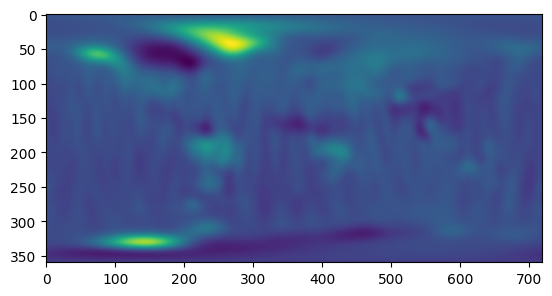

In [18]:
#from pyshbundle import tws_cal
#from pyshbundle.tws_cal import tws_cal

lmax = 96
gs = 0.5
half_rad_gf = 500
no_of_files = 196

tws_fields_itsg = TWSCalc(sub_mat_itsg,lmax,gs,half_rad_gf,no_of_files)
#tws_fields_istg = np.float32(tws_fields_itsg)

In [19]:
lon = np.arange(-180,180,gs)
lat = np.arange(89,-91,-gs)
dates = pd.to_datetime(pd.Series(dates_itsg[:196]), format='%Y-%m') #.dt.strftime('%d-%m-%Y')


ds = xr.Dataset(
    data_vars=dict(
        tws=(["time","lat", "lon"], np.float32(tws_fields_itsg))
    ),
    coords = {
        "time":(('time'),dates),
        "lat":lat,
        "lon":lon },
    attrs=dict(description="TWS Anomaly corresponding to long term (2004-2010) mean \n lmax=96 and half radius of Gaussian filter = 500Km"),
)
ds

<xarray.Dataset>
Dimensions:  (time: 196, lat: 360, lon: 720)
Coordinates:
  * time     (time) datetime64[ns] 2002-04-01 2002-05-01 ... 2021-05-01
  * lat      (lat) float64 89.0 88.5 88.0 87.5 87.0 ... -89.0 -89.5 -90.0 -90.5
  * lon      (lon) float64 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
Data variables:
    tws      (time, lat, lon) float32 20.09 20.11 20.13 ... 107.5 107.5 107.6
Attributes:
    description:  TWS Anomaly corresponding to long term (2004-2010) mean \n ...

In [20]:
def field2dataset(data_variable, description=None):
    gs = 1.0
    lon = np.arange(-180,180,gs)
    lat = np.arange(89,-91,-gs)
    dates = pd.to_datetime(dates_itsg[0], format='%Y-%m') #.dt.strftime('%d-%m-%Y')


    ds = xr.Dataset(data_vars=dict(tws=(["lat", "lon"], data_variable)),
            coords = {
                "lat":lat,
                "lon":lon },
            attrs=dict(description=f"{description}"),)
    return ds

Area of basin in km2: 6499645.5323355235


/media/abhishek/DATA/projects/pysh_new/lib/python3.11/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


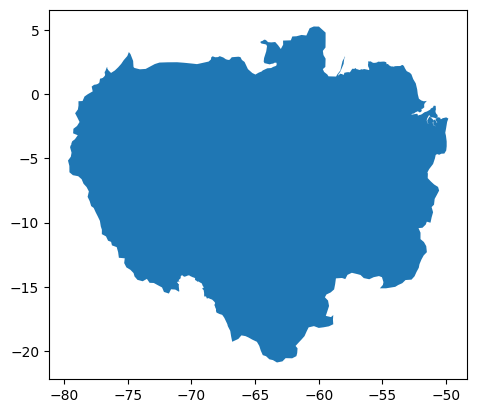

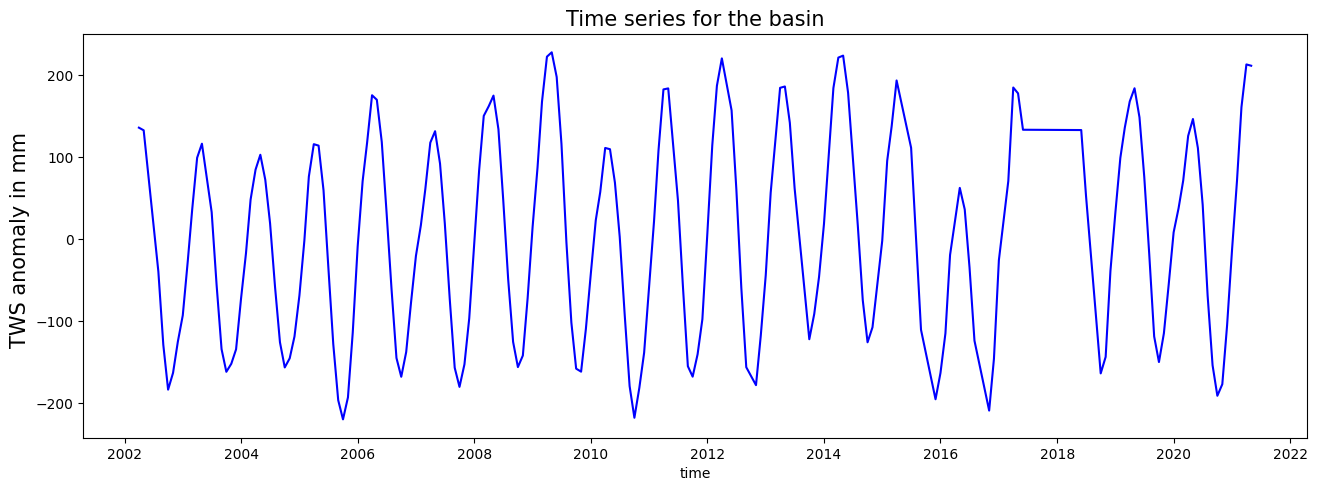

In [21]:
amazon_tws_itsg, data_vars = BasinAvg(ds, path_shapefile, c_rs, no_of_files, gs)

Here it can be seen that the default plot does not show the nuances properly, there are certain datagaps which need to be indicated using the following process.

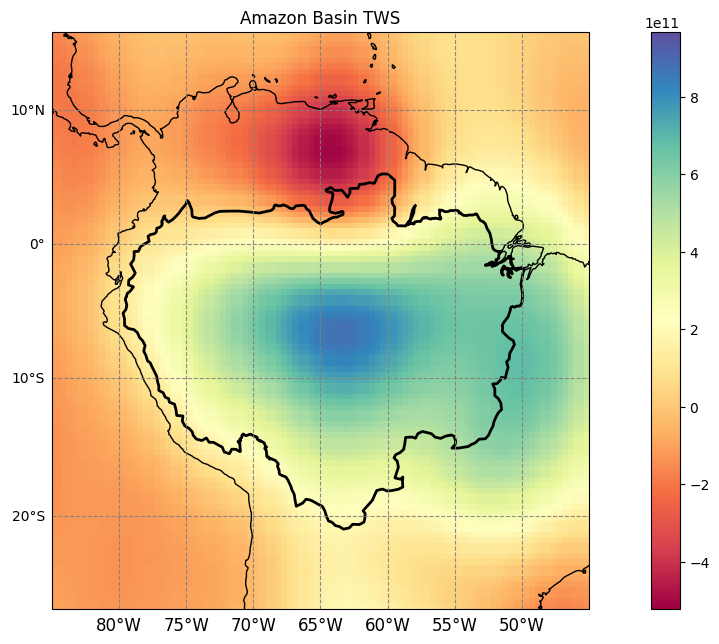

In [22]:
fig = plt.figure(figsize=(16, 7.5))
geo_ax = plt.axes(projection = ccrs.Mercator())

# This can be converted into a `proj4` string/dict compatible with GeoPandas
im = geo_ax.imshow(data_vars.tws[0], origin='upper', cmap='Spectral', transform=ccrs.PlateCarree(),)
gl = geo_ax.gridlines(crs = ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, color='gray', alpha=0.9, linestyle='--')
    # remove top x label
gl.top_labels = False
# change x label styles - font size ad colour
gl.xlabel_style = {'size':12,}
# left and right labels
gl.left_labels = True
gl.right_labels = False
# coastlines
geo_ax.set_extent((-85, -45, -25, 15))
geo_ax.coastlines()
plt.title("Amazon Basin TWS")
crs_proj4 = ccrs.Mercator().proj4_init
df_ae = amazon_shp.to_crs(crs_proj4)

# Here's what the plot looks like in GeoPandas
df_ae.plot(ax=geo_ax, facecolor="None", edgecolor='k', linewidth = 2,)

plt.colorbar(im)

In [23]:
df_itsg = pd.DataFrame()
df_itsg['date_grace'] = pd.date_range(start=dates_itsg[0],end=dates_itsg[-1], freq='M').to_period('M')
df_itsg['tws'] = np.nan

In [24]:
dates_itsg[-1]

'2022-11'

In [25]:
dates_grace = []
for date in dates:
    dates_grace.append(date.to_period('M'))

In [26]:
for i in range(230):
    date_gr = df_itsg.date_grace[i]
    if date_gr in dates_grace:
        idx = dates_grace.index(date_gr)
        df_itsg.tws[i] = amazon_tws_itsg.values[idx]


/tmp/ipykernel_56422/2760827488.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_itsg.tws[i] = amazon_tws_itsg.values[idx]


In [27]:
df_itsg

,date_grace,tws
0,2002-04,135.455051
1,2002-05,132.216824
2,2002-06,NaN
3,2002-07,NaN
4,2002-08,-39.861949
...,...,...
242,2022-06,NaN
243,2022-07,NaN
244,2022-08,NaN
245,2022-09,NaN


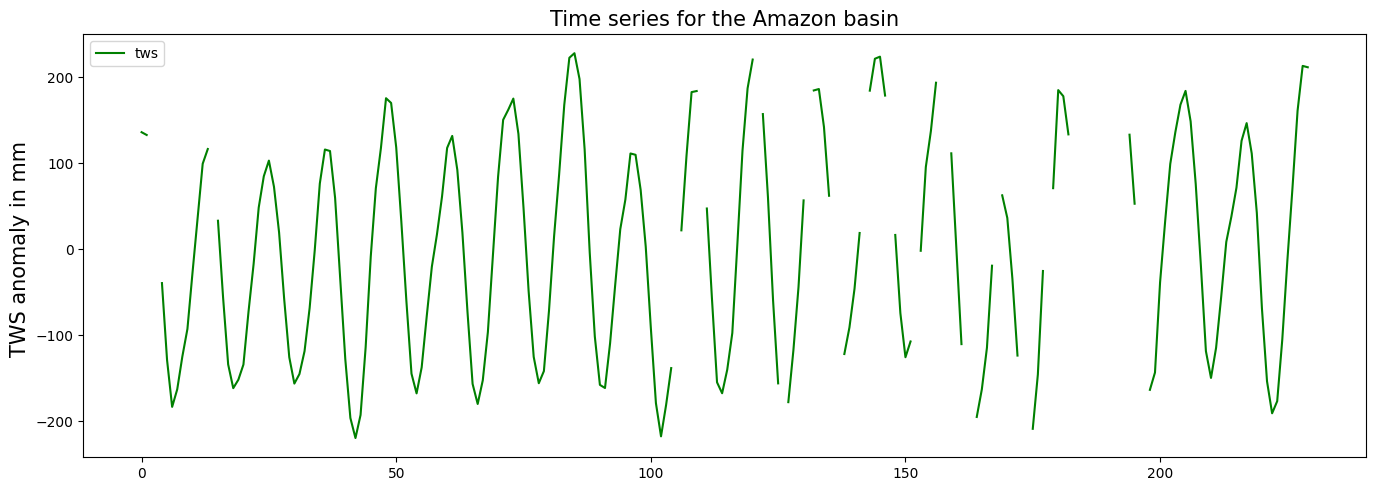

In [28]:
fig,ax = plt.subplots(figsize=(15,5))

df_itsg.plot(ax=ax, color='g', label="ITSG")
ax.set_box_aspect(0.33)
ax.set_title('Time series for the Amazon basin', size=15)
ax.set_ylabel('TWS anomaly in mm ', size=15)
#plt.xticks(x_ticks)
plt.tight_layout()

